# Business Scenario: Data Science extracts meaningful insight from chunks of raw data, which is useful to different business segments for planning their future course of action. Finance is probably one of the first to catch on to this trend with a rise in the penetration of analytics into many aspects of our lives. 

Here, we will analyze data from the stock market for some technology stocks such as Apple, Google, Amazon, and Microsoft.Objective: Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze the information, visualize it, and look at different ways to analyze the risk of a stock, based on its performance history.

In [1]:
!pip install pandas matplotlib yfinance


In [2]:
# importing libraries 

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# reading data directly

# Download the stock data for Amazon
amzn_df = yf.download('AMZN', start='2015-01-01', end='2022-02-23', progress=False)
amzn_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000
2015-01-08,15.0160,15.1570,14.8055,15.0230,15.0230,61768000


In [30]:
aapl_df = yf.download('AAPL', start='2015-01-01', end='2022-02-23', progress=False)
aapl_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565697,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873644,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875887,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210678,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140911,237458000


In [31]:
goog_df = yf.download('GOOGL', start='2015-01-01', end='2022-02-23', progress=False)
goog_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000


In [32]:
msc_df = yf.download('MSFT', start='2015-01-01', end='2022-02-23', progress=False)
msc_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.709461,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.335110,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.743080,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.248039,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.432076,29645200


In [33]:
# Check for missing values
amzn_df.isna().sum()

# Remove any rows with missing values
amzn_df.dropna(inplace=True)

# Check the data types
amzn_df.info()

# Change the data type of the 'Volume' column to integer
amzn_df['Volume'] = amzn_df['Volume'].astype(int)
# Calculate the daily returns
amzn_df['Daily Returns'] = amzn_df['Close'].pct_change()

amzn_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1600 entries, 2015-10-15 to 2022-02-22
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1600 non-null   float64
 1   High           1600 non-null   float64
 2   Low            1600 non-null   float64
 3   Close          1600 non-null   float64
 4   Adj Close      1600 non-null   float64
 5   Volume         1600 non-null   int32  
 6   MA30           1600 non-null   float64
 7   MA100          1600 non-null   float64
 8   Daily Return   1600 non-null   float64
 9   Trend          1600 non-null   object 
 10  Daily Returns  1600 non-null   float64
dtypes: float64(9), int32(1), object(1)
memory usage: 143.8+ KB


,Open,High,Low,Close,Adj Close,Volume,MA30,MA100,Daily Return,Trend,Daily Returns
Date,,,,,,,,,,,
2015-10-15,27.387501,28.150000,27.350000,28.122000,28.122000,98740000,26.481100,24.559760,0.032322,Positive,NaN
2015-10-16,28.263500,28.547001,28.015499,28.538000,28.538000,86316000,26.591167,24.629430,0.014793,Positive,0.014793
2015-10-19,28.538000,28.950001,28.368999,28.657499,28.657499,87508000,26.714750,24.702720,0.004187,Positive,0.004187
2015-10-20,28.600000,28.650000,27.764000,28.044001,28.044001,86924000,26.786983,24.768545,-0.021408,Negative,-0.021408
2015-10-21,28.193501,28.262501,27.625999,27.788500,27.788500,66872000,26.851783,24.830970,-0.009111,Negative,-0.009111
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,157.605499,158.007004,154.637497,156.510498,156.510498,56440000,154.733883,166.024835,0.008658,Positive,0.008658
2022-02-16,155.790497,158.834000,154.734497,158.100494,158.100494,52704000,154.419832,165.893080,0.010159,Positive,0.010159
2022-02-17,158.145996,160.348999,154.500000,154.652496,154.652496,64032000,154.096349,165.736705,-0.021809,Negative,-0.021809


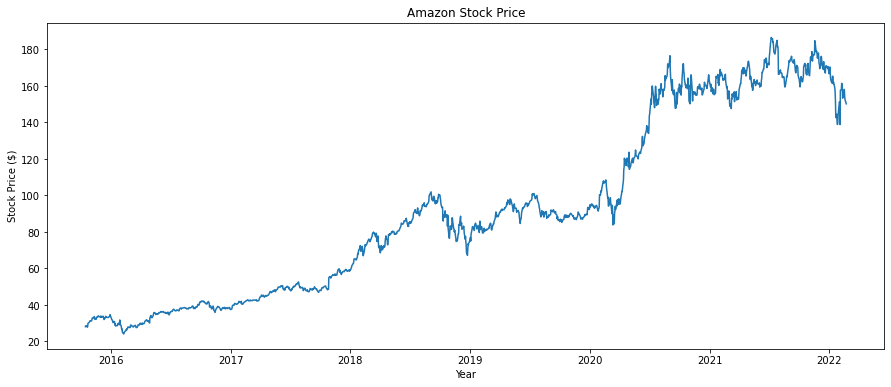

In [34]:
# Plot the stock price over time
plt.figure(figsize=(15, 6))
plt.plot(amzn_df['Close'])
plt.title('Amazon Stock Price')
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.show()


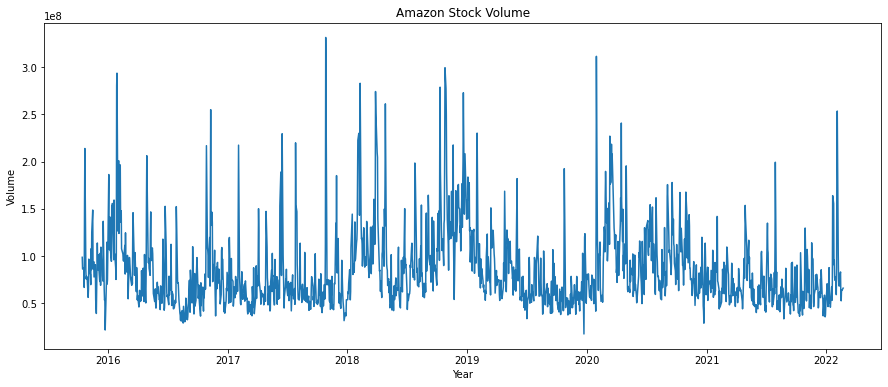

In [35]:
# Plot the volume of stocks traded over time
plt.figure(figsize=(15, 6))
plt.plot(amzn_df['Volume'])
plt.title('Amazon Stock Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()


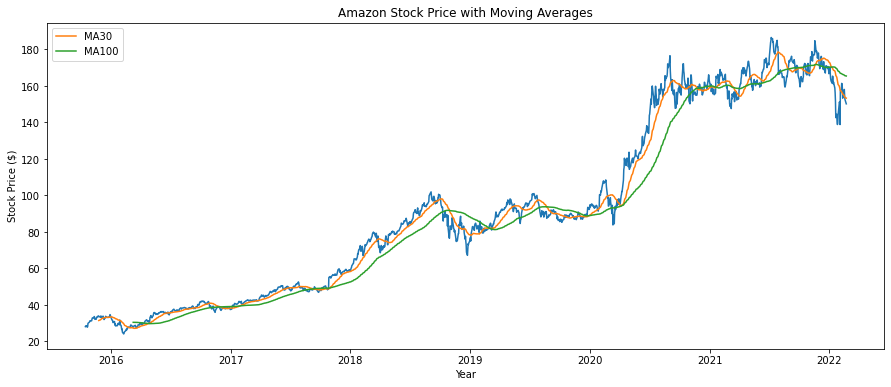

In [36]:
# Calculate the moving average of the stock price for a 30-day period
amzn_df['MA30'] = amzn_df['Close'].rolling(window=30).mean()

# Calculate the moving average of the stock price for a 100-day period
amzn_df['MA100'] = amzn_df['Close'].rolling(window=100).mean()

# Plot the stock price along with its moving averages
plt.figure(figsize=(15, 6))
plt.plot(amzn_df['Close'])
plt.plot(amzn_df['MA30'], label='MA30')
plt.plot(amzn_df['MA100'], label='MA100')
plt.title('Amazon Stock Price with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.show()


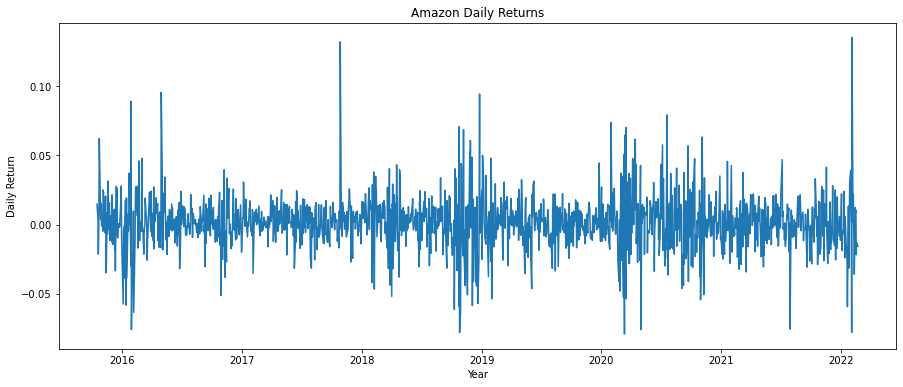

In [37]:
# Calculate the daily returns of the stock
amzn_df['Daily Return'] = amzn_df['Close'].pct_change()

# Plot the daily returns of the stock
plt.figure(figsize=(15, 6))
plt.plot(amzn_df['Daily Return'])
plt.title('Amazon Daily Returns')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.show()


In [38]:
# Add a new column 'Trend' based on the daily return of the stock
amzn_df['Trend'] = amzn_df['Daily Return'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Print the head of the DataFrame
amzn_df.head()


,Open,High,Low,Close,Adj Close,Volume,MA30,MA100,Daily Return,Trend,Daily Returns
Date,,,,,,,,,,,
2015-10-15,27.387501,28.150000,27.350000,28.122000,28.122000,98740000,NaN,NaN,NaN,Negative,NaN
2015-10-16,28.263500,28.547001,28.015499,28.538000,28.538000,86316000,NaN,NaN,0.014793,Positive,0.014793
2015-10-19,28.538000,28.950001,28.368999,28.657499,28.657499,87508000,NaN,NaN,0.004187,Positive,0.004187
2015-10-20,28.600000,28.650000,27.764000,28.044001,28.044001,86924000,NaN,NaN,-0.021408,Negative,-0.021408
2015-10-21,28.193501,28.262501,27.625999,27.788500,27.788500,66872000,NaN,NaN,-0.009111,Negative,-0.009111


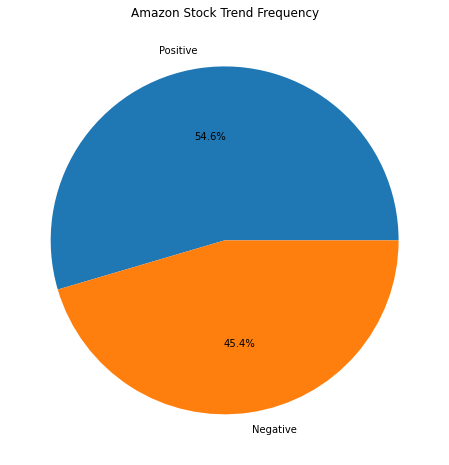

In [39]:
# Count the number of positive and negative trends
trend_counts = amzn_df['Trend'].value_counts()

# Plot a pie chart of the trend frequency
plt.figure(figsize=(8, 8))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%')
plt.title('Amazon Stock Trend Frequency')
plt.show()


In [40]:
# Create a new DataFrame with daily returns of all stocks
stocks_df = pd.concat([amzn_df['Daily Returns'], aapl_df['Daily Returns'], googl_df['Daily Returns'], msft_df['Daily Returns']], axis=1)
stocks_df.columns = ['Amazon', 'Apple', 'Google', 'Microsoft']

# Calculate the correlation matrix
corr_matrix = stocks_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Daily Returns of Different Stocks')
plt.show()


KeyError: 'Daily Returns'